## create a connection to the database using the library sqlite3

In [93]:
import pandas as pd
import sqlite3

In [94]:
conn = sqlite3.connect('../ex00/data/checking-logs.sqlite.sqlite copy')

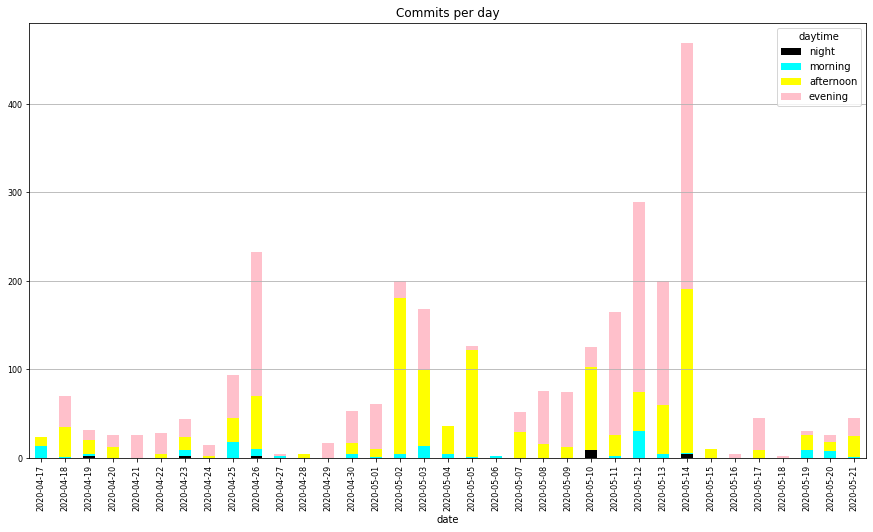

In [95]:
data = pd.io.sql.read_sql("""
SELECT  date.timestamp as date, 
        night.night, 
        morning.morning, 
        afternoon.afternoon, 
        evening.evening
FROM ((
    SELECT strftime("%Y-%m-%d",timestamp) AS timestamp
        FROM checker
        WHERE uid LIKE "user_%"
        GROUP BY strftime("%Y-%m-%d",timestamp)) date
    LEFT JOIN
    (SELECT timestamp, count() as night
        FROM checker
        WHERE uid LIKE 'user_%' AND strftime("%H:%m:%s",timestamp) >= strftime("%H:%m:%s", "00:00:00") AND strftime("%H:%m:%s",timestamp) <= strftime("%H:%m:%s", "03:59:59")
        GROUP BY strftime("%Y-%m-%d",timestamp)) night
    on strftime("%Y-%m-%d", date.timestamp) = strftime("%Y-%m-%d", night.timestamp)
    LEFT JOIN
    (SELECT timestamp, count() as morning
        FROM checker
        WHERE uid LIKE 'user_%' AND strftime("%H:%m:%s",timestamp) >= strftime("%H:%m:%s", "04:00:00") AND strftime("%H:%m:%s",timestamp) <= strftime("%H:%m:%s", "09:59:59")
        GROUP BY strftime("%Y-%m-%d",timestamp)) morning
    on strftime("%Y-%m-%d", date.timestamp) = strftime("%Y-%m-%d", morning.timestamp)
    LEFT JOIN
    (SELECT timestamp, count() as afternoon
        FROM checker
        WHERE uid LIKE 'user_%' AND strftime("%H:%m:%s",timestamp) >= strftime("%H:%m:%s", "10:00:00") AND strftime("%H:%m:%s",timestamp) <= strftime("%H:%m:%s", "16:59:59")
        GROUP BY strftime("%Y-%m-%d",timestamp)) afternoon
    on strftime("%Y-%m-%d", date.timestamp) = strftime("%Y-%m-%d", afternoon.timestamp)
    LEFT JOIN
    (SELECT timestamp, count() as evening
        FROM checker
        WHERE uid LIKE 'user_%' AND strftime("%H:%m:%s",timestamp) >= strftime("%H:%m:%s", "17:00:00") AND strftime("%H:%m:%s",timestamp) <= strftime("%H:%m:%s", "23:59:59")
        GROUP BY strftime("%Y-%m-%d",timestamp)) evening
    on strftime("%Y-%m-%d", date.timestamp) = strftime("%Y-%m-%d", evening.timestamp))
""", conn)

plot = data.plot.bar(x='date',figsize=(15,8),  fontsize=8, stacked=True,
                    color={"night": "black", "morning": "cyan", "afternoon": "yellow", "evening": "pink"},
                    title='Commits per day')
plot.grid(axis='y')
plot.legend(title='daytime')
conn.close()

## “When do our users usually commit the labs: in the night, morning, afternoon,  or evening?”, the answer is the two most common periods.
## Afternoon and Evening

## Which day has: 
### ∗ the most number of commits 
### ∗ and at the same time, the number of commits in the evening is higher than in the afternoon?
# 2020-05-15 (this is answare)